Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.1654 - loss: 5.5165 - val_accuracy: 0.2192 - val_loss: 2.2627
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2230 - loss: 2.1647 - val_accuracy: 0.2598 - val_loss: 2.0588
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2399 - loss: 2.0854 - val_accuracy: 0.2714 - val_loss: 2.0269
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2444 - loss: 2.0584 - val_accuracy: 0.2535 - val_loss: 2.0479
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2499 - loss: 2.0442 - val_accuracy: 0.2579 - val_loss: 2.0330
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2579 - loss: 2.0335 - val_accuracy: 0.2636 - val_loss: 2.0014
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2529 - loss: 2.0446 - val_accuracy: 0.2752 - val_loss: 2.0004
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2574 - loss: 2.0342 - val_

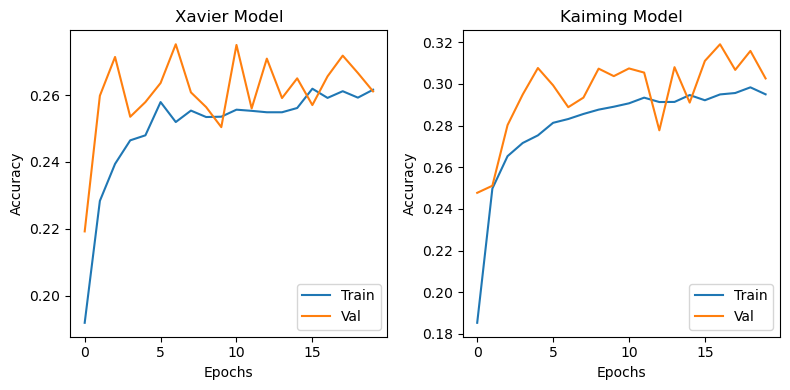

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers,initializers

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train=X_train/255
X_test=X_test/255
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

def Create_Model(Units,Activation=None,Regularizer=None,Initializer=None):
    model=Sequential()
    model.add(Input(shape=(32,32,3)))
    model.add(Flatten())
    for i in Units:
        model.add(Dense(units=i,activation=Activation,kernel_regularizer=Regularizer,kernel_initializer=Initializer))
    model.add(Dropout(0.5))
    model.add(Dense(units=10,activation='softmax'))
    return model

Xavier_model=Create_Model([512,256,128,64],'relu',regularizers.L2(0.01),initializers.glorot_normal())
Kaiming_model=Create_Model([512,256,128,64],'relu',regularizers.L2(0.01),initializers.he_normal())

Xavier_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
Kaiming_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

Xavier_history=Xavier_model.fit(X_train,y_train_cat,epochs=20,validation_split=0.2,batch_size=64)
kaiming_history=Kaiming_model.fit(X_train,y_train_cat,epochs=20,validation_split=0.2,batch_size=64)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Xavier Model')
plt.plot(Xavier_history.history['accuracy'],label='Train')
plt.plot(Xavier_history.history['val_accuracy'],label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title("Kaiming Model")
plt.plot(kaiming_history.history['accuracy'],label='Train')
plt.plot(kaiming_history.history['val_accuracy'],label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
